In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nltk.data.clear_cache()  # Clear cached data
nltk.download('punkt')   # Reinstall punkt
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     f:\Anaconda\envs\CSE156\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     f:\Anaconda\envs\CSE156\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
df = pd.read_csv("RAW_interactions.csv")

In [4]:
tfidf = TfidfVectorizer(sublinear_tf=True, analyzer='word', max_features=2000, tokenizer=word_tokenize)

In [5]:
X = df['review']
y = df['rating']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
X_train = X_train.fillna('')  # Replace NaN values with empty strings
X_test = X_test.fillna('')
X_train, X_test = list(X_train), list(X_test)

In [ ]:
len(X_train)
X_train = X_train[:500]

In [8]:
X_train = tfidf.fit_transform(X_train)

In [ ]:
len(X_test)
X_test = X_test[:500]

In [10]:
X_test = tfidf.transform(X_test)

In [ ]:
y_train = y_train[:500]
y_test = y_test[:500]

In [12]:
svr_rbf = SVR(kernel="rbf")
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly")
svr_sigmoid = SVR(kernel="sigmoid")

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [14]:
# for i in kernels:
#     reg = SVR(kernel = i)
#     reg.fit(X_train, y_train)

#     y_pred = reg.predict(X_test)

#     from sklearn.metrics import mean_squared_error
#     mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
#     print(i + " mse: " + str(mse))

#     from sklearn.metrics import root_mean_squared_error
#     rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
#     print(i + " rmse: " + str(rmse))

ValueError: x and y must be the same size

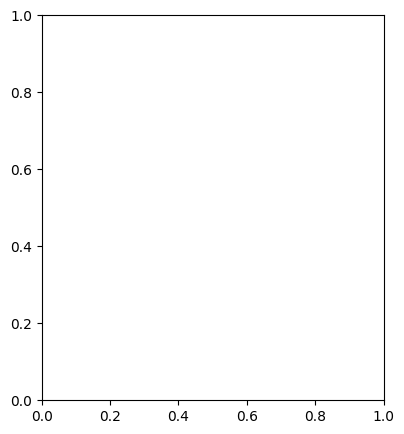

In [16]:
# Define SVR models with different kernels
svr_rbf = SVR(kernel="rbf", C=1e3, gamma=0.1)
svr_linear = SVR(kernel="linear", C=1e3)
svr_poly = SVR(kernel="poly", C=1e3, degree=2)

# Fit models
svr_rbf.fit(X_train, y_train)
svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

# Predict on the test set
y_rbf = svr_rbf.predict(X_test)
y_linear = svr_linear.predict(X_test)
y_poly = svr_poly.predict(X_test)

# Plotting
lw = 2
plt.figure(figsize=(15, 5))

# RBF Kernel
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color="k", label="other training data")
plt.scatter(X_train[svr_rbf.support_], y_train[svr_rbf.support_], facecolor="none", edgecolor="m", s=100, label="RBF support vectors")
plt.plot(X_test, y_rbf, color="m", lw=lw, label="RBF model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()

# Linear Kernel
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color="k", label="other training data")
plt.scatter(X_train[svr_linear.support_], y_train[svr_linear.support_], facecolor="none", edgecolor="c", s=100, label="Linear support vectors")
plt.plot(X_test, y_linear, color="c", lw=lw, label="Linear model")
plt.xlabel("data")
plt.title("Support Vector Regression")
plt.legend()

# Polynomial Kernel
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color="k", label="other training data")
plt.scatter(X_train[svr_poly.support_], y_train[svr_poly.support_], facecolor="none", edgecolor="g", s=100, label="Polynomial support vectors")
plt.plot(X_test, y_poly, color="g", lw=lw, label="Polynomial model")
plt.xlabel("data")
plt.title("Support Vector Regression")
plt.legend()

plt.tight_layout()
plt.show()